In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('seaborn-v0_8-whitegrid')

# Wrangle and Visualize Global COVID-19 Deaths 

This notebook contains a solution proposal to BAN405 mandatory assignment #2.

## Task 1: Data wrangling

First, we must import the data and wrangle it into a format that is suitable for visualizing the trends in COVID deaths in different countries over time.

**1. Load the COVID data set and explore the data.**

In [2]:
# Import covid data from url
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_covid = pd.read_csv(url)

# Drop lat and long (will not be used)
df_covid.drop(['Lat', 'Long'], axis = 1, inplace = True)

print(len(df_covid))
df_covid.head()

289


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [3]:
# Check data types of first 10 columns
# (location identifiers are strings and date columns are integers)
df_covid.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province/State  91 non-null     object
 1   Country/Region  289 non-null    object
 2   1/22/20         289 non-null    int64 
 3   1/23/20         289 non-null    int64 
 4   1/24/20         289 non-null    int64 
 5   1/25/20         289 non-null    int64 
 6   1/26/20         289 non-null    int64 
 7   1/27/20         289 non-null    int64 
 8   1/28/20         289 non-null    int64 
 9   1/29/20         289 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 22.7+ KB


In [4]:
# Check how many unique countries/regions
df_covid['Country/Region'].nunique()

201

In [5]:
# Check which unique values in country/region
df_covid['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [6]:
# Check number of missings
# (appears that only province/state contains missings)
df_covid.isna().sum()

Province/State    198
Country/Region      0
1/22/20             0
1/23/20             0
1/24/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1145, dtype: int64

In [7]:
# Check rows with not missings in state/province
df_covid[df_covid['Province/State'].notna()]

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
9,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,224,224,228,228,228,228,228,228,228,228
10,New South Wales,Australia,0,0,0,0,0,0,0,0,...,6464,6464,6493,6493,6493,6493,6493,6493,6493,6529
11,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,90,90,90,90,90,90,90,90,90,91
12,Queensland,Australia,0,0,0,0,0,0,0,0,...,2760,2760,2783,2783,2783,2783,2783,2783,2783,2783
13,South Australia,Australia,0,0,0,0,0,0,0,0,...,1322,1322,1322,1322,1322,1322,1322,1322,1322,1365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Jersey,United Kingdom,0,0,0,0,0,0,0,0,...,161,161,161,161,161,161,161,161,161,161
274,Montserrat,United Kingdom,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
275,Pitcairn Islands,United Kingdom,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check which countries have multiple state/provinces
df_covid[df_covid['Province/State'].notna()]['Country/Region'].unique()

array(['Australia', 'Canada', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

In [9]:
# Check how many state/province these countries have
df_covid[df_covid['Province/State'].notna()].groupby('Country/Region').size()

Country/Region
Australia          8
Canada            16
China             34
Denmark            2
France            11
Netherlands        4
New Zealand        2
United Kingdom    14
dtype: int64

In [10]:
# Check how many countries don't have multiple state/provinces
df_covid[df_covid['Province/State'].isna()]['Country/Region'].nunique()

198

**2. Reshape the data from wide to long so that dates are in a single column (i.e., tidy format).**

To have the dates in a single column instead of as column labels, we must reshape the data from wide to long using the pandas method `melt`. However, because some countries have multiple states/provinces, we must use both `Province/State` and `Country/Region` as identifier variables. We also assign the new columns in the DataFrame the labels `Date` and `Total_deaths`.

In [11]:
df_covid = df_covid.melt(
    id_vars = ['Province/State', 'Country/Region'],
    var_name = 'Date', # Label for the column containing the previous column labels
    value_name = 'Total_deaths' # Labe for the column containing the values in the previous columns
)

print(len(df_covid))
df_covid.head()

330327


,Province/State,Country/Region,Date,Total_deaths
0,NaN,Afghanistan,1/22/20,0
1,NaN,Albania,1/22/20,0
2,NaN,Algeria,1/22/20,0
3,NaN,Andorra,1/22/20,0
4,NaN,Angola,1/22/20,0


In [12]:
# Check dtypes in long df
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  104013 non-null  object
 1   Country/Region  330327 non-null  object
 2   Date            330327 non-null  object
 3   Total_deaths    330327 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 10.1+ MB


In [13]:
# Check number of missings
df_covid.isna().sum()

Province/State    226314
Country/Region         0
Date                   0
Total_deaths           0
dtype: int64

**3. Convert dates to timestamps with the correct date format.**

Because the dates are objects (i.e., strings), we must change the data type to timestamps using the pandas method `to_datetime`. However, note that this method has a preference for dates that are in the format "YYYY-MM-DD", and it may therefore not infer the format correctly if the dates are in a different format. 

In our case, we must use the `format` parameter to specify that the dates are in the format "m/d/yy". See [strftime documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for more information on choices in the format specifier.

In [14]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'], format = '%m/%d/%y')

df_covid.head()

,Province/State,Country/Region,Date,Total_deaths
0,NaN,Afghanistan,2020-01-22,0
1,NaN,Albania,2020-01-22,0
2,NaN,Algeria,2020-01-22,0
3,NaN,Andorra,2020-01-22,0
4,NaN,Angola,2020-01-22,0


In [15]:
# Check that dates are now timestamps
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  104013 non-null  object        
 1   Country/Region  330327 non-null  object        
 2   Date            330327 non-null  datetime64[ns]
 3   Total_deaths    330327 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 10.1+ MB


In [16]:
# Check min and max dates (data starts on Jan 22, 2020 and ends on March 9, 2023)
print(df_covid['Date'].min())
print(df_covid['Date'].max())

2020-01-22 00:00:00
2023-03-09 00:00:00


**4. Aggregate the data to the country-level.** 

As some countries have multiple provinces or states, we must sum up the deaths across province/state in each country on each day. This will give us the total number of cumulative deaths on the country-level.

We can do this by using `groupby` in which we group the data for each country on each day, and then use the aggregation method `sum` to sum the number of deaths across provinces or states in each country. However, we first drop the column for the state or province to avoid that this operation also "sums" the strings in this column for those countries with multiple observations.

In [17]:
# Drop state/province
df_covid.drop('Province/State', axis = 1, inplace = True)

# Sum number of deaths for each country on each day 
# (use reset index to return the country and day column to the df)
df_covid = df_covid.groupby(['Country/Region', 'Date']).sum().reset_index()

print(len(df_covid))
df_covid.head()

229743


,Country/Region,Date,Total_deaths
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [18]:
# Check number of unique observations (i.e., days) for each country
# (all countries have the same number of days (1143) now)
df_covid.groupby('Country/Region').size()#.value_counts()

Country/Region
Afghanistan             1143
Albania                 1143
Algeria                 1143
Andorra                 1143
Angola                  1143
                        ... 
West Bank and Gaza      1143
Winter Olympics 2022    1143
Yemen                   1143
Zambia                  1143
Zimbabwe                1143
Length: 201, dtype: int64

**5. Create a new column that contains the daily number of new deaths in each country on each day.**

Since the number of deaths are accumulated sums over time, we can calculate the new number of deaths for each day by simply subtracting the value on total deaths from the value observed on the previous day. We can do this for each country by using `groupby` and then apply the `diff` method on the column with total deaths.

However, note that we must first ensure that observations for each country are sorted according to dates.

In [19]:
# Sort rows according to dates for each country
# (note that data was already sorted correctly, but best to be on the safe side)
df_covid.sort_values(['Country/Region', 'Date'], inplace = True)

# Calculate number of daily new deaths for each country
df_covid['New_deaths'] = df_covid.groupby('Country/Region')['Total_deaths'].diff()

df_covid.head()

,Country/Region,Date,Total_deaths,New_deaths
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0


In [20]:
# Check rows with missing value on new deaths
df_covid[df_covid['New_deaths'].isna()]

,Country/Region,Date,Total_deaths,New_deaths
0,Afghanistan,2020-01-22,0,NaN
1143,Albania,2020-01-22,0,NaN
2286,Algeria,2020-01-22,0,NaN
3429,Andorra,2020-01-22,0,NaN
4572,Angola,2020-01-22,0,NaN
...,...,...,...,...
224028,West Bank and Gaza,2020-01-22,0,NaN
225171,Winter Olympics 2022,2020-01-22,0,NaN
226314,Yemen,2020-01-22,0,NaN
227457,Zambia,2020-01-22,0,NaN


In [21]:
# Check which dates are missing value on new deaths
# (see that this is only the case for the first observed date)
df_covid[df_covid['New_deaths'].isna()]['Date'].unique()

<DatetimeArray>
['2020-01-22 00:00:00']
Length: 1, dtype: datetime64[ns]

## Task 2: Data visualization

Now that we have a tidy DataFrame with COVID deaths (both total and new deaths), we can use the data to visualize deaths for different countries. We produce the following visualizations:

**1a) A single graph that contains line plots of total deaths over time for the three countries with the highest total number of COVID-19 deaths in the data.**


First, we have to identify which countries in our data experienced the highest number of total COVID-19 deaths. We can extract this information in several different ways, e.g., by summing the number of new deaths for each country, or by simply checking the total number of deaths on the last day in the sample for each country.

In [22]:
# Alt. 1: sum new deaths by country and check top values
df_covid.groupby('Country/Region')['New_deaths'].sum().sort_values(ascending=False)

Country/Region
US                      1123836.0
Brazil                   699276.0
India                    530779.0
Russia                   388478.0
Mexico                   333188.0
                          ...    
Summer Olympics 2020          0.0
Winter Olympics 2022          0.0
Antarctica                    0.0
Tuvalu                        0.0
Holy See                      0.0
Name: New_deaths, Length: 201, dtype: float64

In [23]:
# Alt. 2: extract last observed value on total deaths for each country
df_covid.groupby('Country/Region')['Total_deaths'].last().sort_values(ascending=False)

Country/Region
US                      1123836
Brazil                   699276
India                    530779
Russia                   388478
Mexico                   333188
                         ...   
Summer Olympics 2020          0
Winter Olympics 2022          0
Antarctica                    0
Tuvalu                        0
Holy See                      0
Name: Total_deaths, Length: 201, dtype: int64

In [24]:
# Alt. 3: filter on last date and sort filtered df according to total deaths
df_last = df_covid[df_covid['Date'] == df_covid['Date'].max()].copy()
df_last.sort_values('Total_deaths', ascending = False, inplace = True)

df_last.head()

,Country/Region,Date,Total_deaths,New_deaths
213740,US,2023-03-09,1123836,590.0
28574,Brazil,2023-03-09,699276,0.0
92582,India,2023-03-09,530779,3.0
169163,Russia,2023-03-09,388478,38.0
134873,Mexico,2023-03-09,333188,18.0


In [25]:
# Extract top three countries by indexing df
countries = df_last['Country/Region'][:3].values

countries

array(['US', 'Brazil', 'India'], dtype=object)

In [26]:
# Alternatively, use the nlargest method
countries = df_last.nlargest(3, 'Total_deaths')['Country/Region'].values

countries

array(['US', 'Brazil', 'India'], dtype=object)

Each of the three methods above shows the the three countries with the highest number of deaths were the US, Brazil and India. We now create a graph with line plots showing the acumulated number of deaths during the pandemic for each of the three countries.

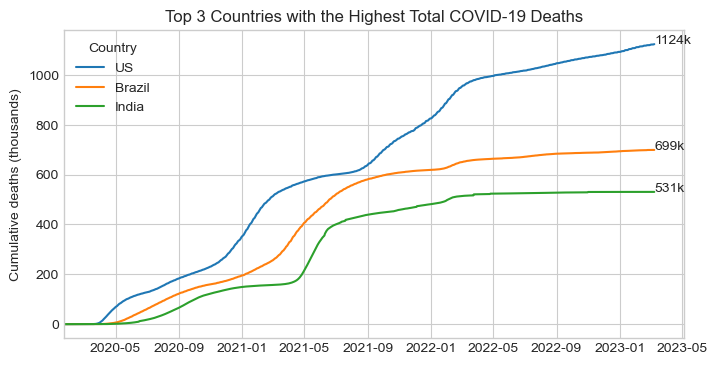

In [27]:
fig, ax = plt.subplots(figsize = (8, 4))

for country in countries:
    # Extract observations for country (sort on dates)
    subset = df_covid[df_covid['Country/Region'] == country].sort_values('Date')
    
    # Create line plot of total deaths for country 
    ax.plot(
        subset['Date'],
        subset['Total_deaths'] / 1000, # scale to thousands to avoid large numbers on yaxis 
        label = country
    )
    # Add label the line with final number of deaths
    last_date = subset['Date'].iloc[-1]
    last_value = subset['Total_deaths'].iloc[-1] / 1000    
    ax.text(
        last_date,                         # location for text on xaxis
        last_value,                        # location for text on yaxis
        f'{last_value:.0f}k',              # format how number is displayed
        #color = ax.lines[-1].get_color()  # uncomment this to fix text color
    )

# Formatting
ax.set_xlim(df_covid['Date'].min())
ax.set_title('Top 3 Countries with the Highest Total COVID-19 Deaths')
ax.set_ylabel('Cumulative deaths (thousands)')
ax.legend(title = 'Country')

plt.savefig('plots/total_deaths.png', dpi = 500, bbox_inches = 'tight')

**1b) A figure with three subplots that show the daily number of new deaths for Norway, Denmark and Sweden**

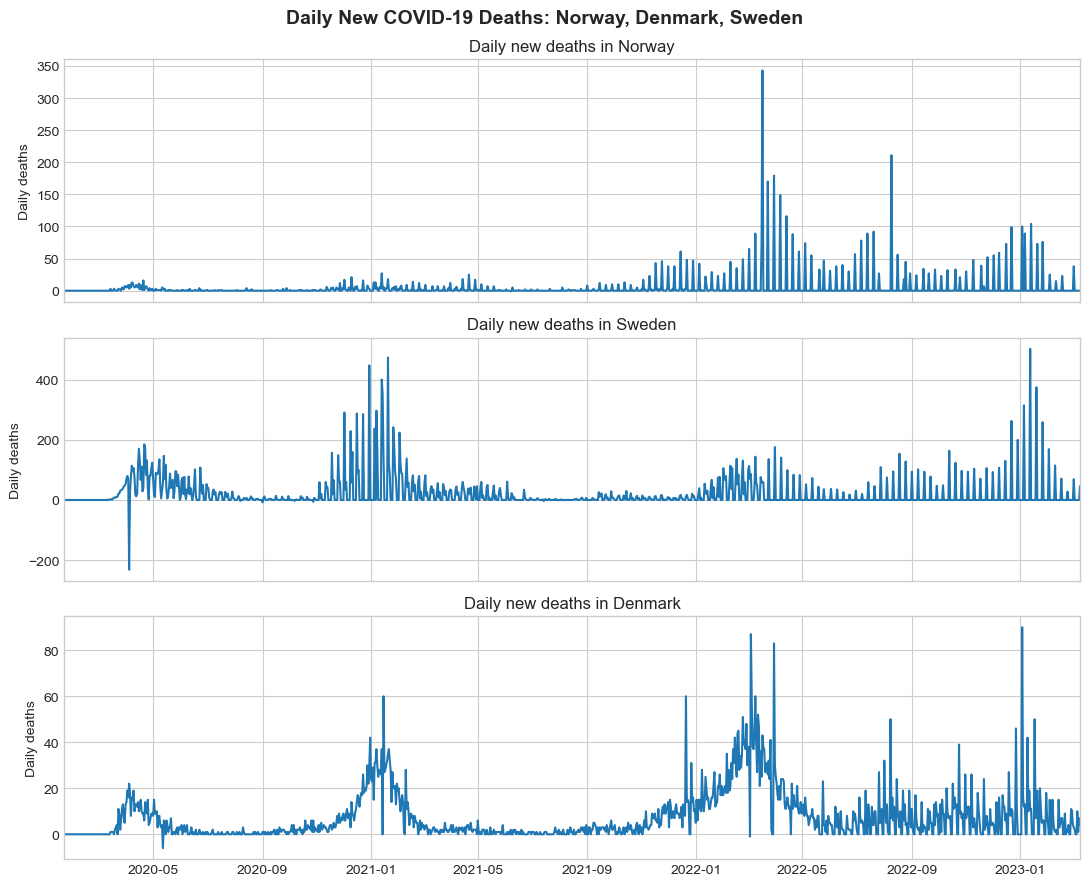

In [28]:
fig, ax = plt.subplots(
    nrows = 3,        # 3x1 subplots
    ncols = 1, 
    figsize = (11, 9), 
    sharex = True # set this to False (or comment out) to add xaxis labels to all subplots
)

countries = ['Norway', 'Sweden', 'Denmark']

for i in range(len(countries)):
    # Extract observations for country (sort on dates)
    subset = df_covid[df_covid['Country/Region'] == countries[i]].sort_values('Date')

    # Create line plot of daily new deaths for country (in subplot)
    ax[i].plot(
        subset['Date'],
        subset['New_deaths'],
    )

    # Formatting of subplot
    ax[i].set_title(f'Daily new deaths in {countries[i]}')
    ax[i].set_ylabel('Daily deaths')
    ax[i].set_xlim(df_covid['Date'].min(), df_covid['Date'].max())

# Add title to figure
fig.suptitle('Daily New COVID-19 Deaths: Norway, Denmark, Sweden', fontsize = 14, weight = 'bold')
plt.tight_layout()  # makes suptitle space look better

plt.savefig('plots/new_deaths.png', dpi = 500, bbox_inches = 'tight')

**2. A reusable plotting function that displays a single line graph that contains the total number of deaths over time for one or more countries.**

For this task we can simply modify the code from task 1a by converting it into a function called `plot_total_deaths`. The function takes two inputs: a list of countries (`countries`) and a DataFrame (`data`) with the COVID-19 deaths; and it displays a single graph with line plots of the total number of deaths for the requested countries. As a default, the function will use the data stored in `df_covid`.

The assignment states that the function should be able to handle function calls in which the list of countries include locations not present in the data (e.g., Atlantis) and also the case where the list of countries is empty. There are several ways to deal with these scenarios. The chosen solution here is to use `if` statements to check that the list of countries is not empty and that at least one of the requested countries is present in the data. If that is not the case, then we use the `return` statement to break out of the function call. Otherwise, we go ahead with creating a line plot for the requested countries that are found in the data.

Note that the function could be furthered improved by ensuring that e.g., the DataFrame does in fact contain the necessary columns (`Country/Region`, `Total_deaths`, `Date`), the dates are timestamps,  and the selected countries are passed as strings inside a list or a list-like object (e.g., tuple).

In [29]:
def plot_total_deaths(countries, data = df_covid):

    # Check that at least one country has been selected
    if len(countries) == 0:
        print('No countries provided. Please supply at least one country name.')
        return # use return statement to break function call no countries have been selected

    # Filter data for selection of countries and check that data is not empty
    df_temp = data[data['Country/Region'].isin(countries)]
    if len(df_temp) == 0:
        print('None of the requested countries were found in the dataset.')
        return # break function call if data does not contain any of the countries

    # Create a line plot for countries present in filtered data 
    fig, ax = plt.subplots(figsize = (8, 4))
    
    for country in df_temp['Country/Region'].unique():
        # Extract observations for country (sort on dates)
        subset = df_temp[df_temp['Country/Region'] == country].sort_values('Date')
        
        # Create line plot of total deaths for country 
        ax.plot(
            subset['Date'],
            subset['Total_deaths'],
            label = country
        )
    
    # Formatting
    ax.set_xlim(df_temp['Date'].min(), df_temp['Date'].max())
    ax.set_title('Cumulative Number of COVID-19 Deaths')
    ax.legend()
    
    # Extra: instead of scaling, add thousand seperator to numbers on yaxis
    # (method from matplotlib.ticker submodule)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.show()

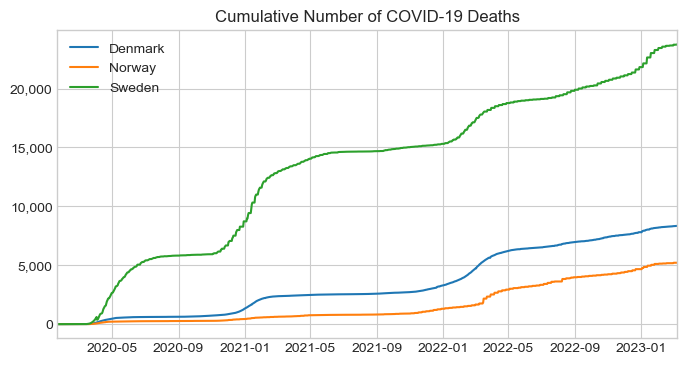

In [30]:
plot_total_deaths(['Norway', 'Denmark', 'Sweden'])

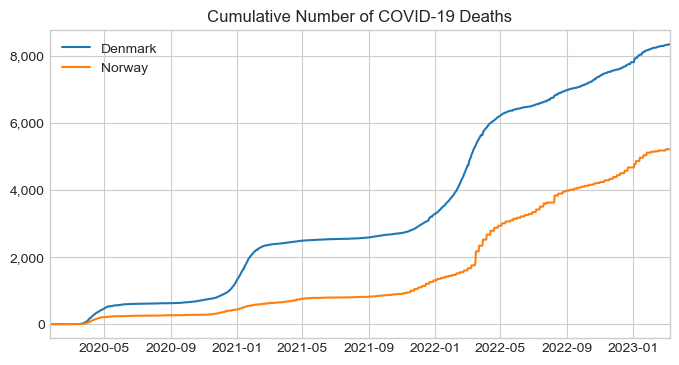

In [31]:
plot_total_deaths(['Norway', 'Denmark', 'Atlantis'])

In [32]:
plot_total_deaths(['The moon', 'Mars', 'Atlantis'])

None of the requested countries were found in the dataset.


In [33]:
plot_total_deaths([])

No countries provided. Please supply at least one country name.


## Task 3: Data merging

Finally, we want to explore COVID-19 deaths between the different parts of the world. To do this we need to merge our COVID data with a new data set ("Countries Continents.csv") that contains data on which continent each country belongs to. The data set is from Our World in Data and it can be imported directly from their GitHub repo [here](https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Countries%20Continents/Countries%20Continents.csv).

**1. Load and explore the new data set.**

In [34]:
url = 'https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Countries%20Continents/Countries%20Continents.csv'
df_owid = pd.read_csv(url)

print(len(df_owid))
df_owid.head()

285


,Entity,Year,Countries Continents
0,Abkhazia,2015,Asia
1,Afghanistan,2015,Asia
2,Akrotiri and Dhekelia,2015,Asia
3,Albania,2015,Europe
4,Algeria,2015,Africa


In [35]:
# Check data types
df_owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                285 non-null    object
 1   Year                  285 non-null    int64 
 2   Countries Continents  285 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.8+ KB


In [36]:
# Check number of missings
df_owid.isna().sum()

Entity                  0
Year                    0
Countries Continents    0
dtype: int64

In [37]:
# Check number of unique countries and the unique values
print(df_owid['Entity'].nunique())
print(df_owid['Entity'].unique())

285
['Abkhazia' 'Afghanistan' 'Akrotiri and Dhekelia' 'Albania' 'Algeria'
 'American Samoa' 'Andorra' 'Angola' 'Anguilla' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Austria-Hungary' 'Azerbaijan' 'Baden' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Bavaria' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Bouvet Island' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Christmas Island' 'Cocos Islands'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Germany' 'Ecuador' 'Egypt' 'El 

In [38]:
# Check unique continents
df_owid['Countries Continents'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'Antarctica', 'South America'], dtype=object)

In [39]:
# Check number of countries per continent
df_owid.groupby('Countries Continents').size()

Countries Continents
Africa           61
Antarctica        4
Asia             62
Europe           75
North America    42
Oceania          26
South America    15
dtype: int64

**2. Merge COVID data with continent information**

Before we can merge the two data sets, we need to ensure that the common columns that we will merge on have the same column labels. We also need to drop the `Year` column from the OWID data set as we do not want this information to appear in our merged data.

In [40]:
df_owid.drop('Year', axis = 1, inplace = True)
df_owid.columns = ['Country', 'Continent']

df_owid.head()

,Country,Continent
0,Abkhazia,Asia
1,Afghanistan,Asia
2,Akrotiri and Dhekelia,Asia
3,Albania,Europe
4,Algeria,Africa


In [41]:
# Use rename to shorten the country column in the COVID data as well
df_covid.rename(columns = {'Country/Region' : 'Country'}, inplace = True)

df_covid.head()

,Country,Date,Total_deaths,New_deaths
0,Afghanistan,2020-01-22,0,NaN
1,Afghanistan,2020-01-23,0,0.0
2,Afghanistan,2020-01-24,0,0.0
3,Afghanistan,2020-01-25,0,0.0
4,Afghanistan,2020-01-26,0,0.0


According to the assignment, there are some slight name variations between the two data sets. To explore this, we perform a *left* join to see how many of the countries in the COVID data that we are able to identify in the OWID data.

In [42]:
df_test = df_covid.merge(df_owid, on = 'Country', how = 'left')

df_test.head()

,Country,Date,Total_deaths,New_deaths,Continent
0,Afghanistan,2020-01-22,0,NaN,Asia
1,Afghanistan,2020-01-23,0,0.0,Asia
2,Afghanistan,2020-01-24,0,0.0,Asia
3,Afghanistan,2020-01-25,0,0.0,Asia
4,Afghanistan,2020-01-26,0,0.0,Asia


In [43]:
# Check how many missing values in new continent column
df_test.isna().sum()

Country             0
Date                0
Total_deaths        0
New_deaths        201
Continent       18288
dtype: int64

In [44]:
# Check which countries have missing continent information
df_test[df_test['Continent'].isna()]['Country'].unique()

array(['Burma', 'Cabo Verde', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Diamond Princess', 'Holy See', 'Korea, North', 'Korea, South',
       'MS Zaandam', 'Micronesia', 'Summer Olympics 2020', 'Taiwan*',
       'Timor-Leste', 'US', 'West Bank and Gaza', 'Winter Olympics 2022'],
      dtype=object)

From our exploration, we see that some of the missing observations on continent information is due to the observation not being an actual country (e.g., "Winter Olympics 2022"), and we can safely ignore these missing values. 

However, other observations (e.g., "US") is most likely due to name variations between the two data sets. From inspecting the OWID data, we find that they label these countries as the following:

- "Burma" is "Myanmar"
- "South, Korea" is "South Korea"
- "North, Korea" is "North Korea"
- "US" is "United States"
- "Taiwan*" is "Taiwan"
- "West Bank and Gaza" is "Palestine"
- "Congo (Brazzaville)" and "Congo (Kinshasa)" is "Congo"

To improve the merge quality between our two data sets, we will update the country names in the COVID data for these countries (we ignore the rest for now).

First, we define a dictionary in which the keys are the old names and the values are the new names. We can then use the `loc` attribute to update the country names in the COVID data with the new names. 

In [45]:
country_d = {
    'Burma' : 'Myanmar',
    'US': 'United States',
    'West Bank and Gaza' : 'Palestine',
    'Korea, North' : 'North Korea',
    'Korea, South' : 'South Korea'
}

# Update all the old country names defined in the dictionary
for key in country_d:
    df_covid.loc[df_covid['Country'] == key, 'Country'] = country_d[key]

In [46]:
# Alternatively, we could have used the pandas method "replace", which
# replaces values in a column based on a mapping from a dictionary
# df_covid['Country'] = df_covid['Country'].replace(country_d)

For the remaining countries, we can use string methods to remove unwanted characters (*) at the end of the name and to drop everything in parenthesis.

In [47]:
# Remove "*" at the end of the name so that Taiwan* becomes Taiwan
df_covid['Country'] = df_covid['Country'].str.rstrip('*')

# Split on "(" and keep only first part so that "Congo (Brazzaville)" becomes Congo
df_covid['Country'] = df_covid['Country'].str.partition('(')[0].str.strip()

However, because we now have two observations for Congo on each day, we must sum the data across countries for each day.

In [48]:
# df_covid.groupby(['Country', 'Date']).size().sort_values(ascending = False)

In [49]:
df_covid = df_covid.groupby(['Country', 'Date']).sum().reset_index()

We can now re-merge the two data sets. However, note that we still use a left join so that we can check that we are now able to merge more countries than before.

In [50]:
df_merge = df_covid.merge(df_owid, on = 'Country', how = 'left')
df_merge.head()

,Country,Date,Total_deaths,New_deaths,Continent
0,Afghanistan,2020-01-22,0,0.0,Asia
1,Afghanistan,2020-01-23,0,0.0,Asia
2,Afghanistan,2020-01-24,0,0.0,Asia
3,Afghanistan,2020-01-25,0,0.0,Asia
4,Afghanistan,2020-01-26,0,0.0,Asia


In [51]:
# Check which countries that have missing continent info
df_merge[df_merge['Continent'].isna()]['Country'].unique()

array(['Cabo Verde', 'Diamond Princess', 'Holy See', 'MS Zaandam',
       'Micronesia', 'Summer Olympics 2020', 'Timor-Leste',
       'Winter Olympics 2022'], dtype=object)

In [52]:
# Check that we have the same number of daily obserations for all countries
df_merge.groupby('Country').size()

Country
Afghanistan             1143
Albania                 1143
Algeria                 1143
Andorra                 1143
Angola                  1143
                        ... 
Vietnam                 1143
Winter Olympics 2022    1143
Yemen                   1143
Zambia                  1143
Zimbabwe                1143
Length: 200, dtype: int64

In [53]:
# Potentially: drop all observations with missing continent info
# df_merge = df_merge.dropna('Continent', axis = 1, inplace = True)

**3. Calculate the total number of COVID deaths per continent**

By summing the number of deaths by continent, we see that it was Europe that had the most number of COVID deaths in the data.

In [54]:
# Sum number of daily deaths by continent
df_merge.groupby(['Continent'])['New_deaths'].sum().sort_values().reset_index()

,Continent,New_deaths
0,Antarctica,0.0
1,Oceania,23931.0
2,Africa,257292.0
3,South America,1350329.0
4,North America,1587146.0
5,Asia,1623529.0
6,Europe,2038931.0


In [55]:
# Alternatively, sum number of total deaths by continent using only the last day
# df_merge[df_merge['Date'] == df_merge['Date'].max()].groupby('Continent')['Total_deaths'].sum()

**4. Create a bar plot of total number of COVID deaths per continent.**

In [56]:
# Create pandas series with continent totals
totals_series = df_merge.groupby(['Continent'])['New_deaths'].sum().sort_values()
totals_series

Continent
Antarctica             0.0
Oceania            23931.0
Africa            257292.0
South America    1350329.0
North America    1587146.0
Asia             1623529.0
Europe           2038931.0
Name: New_deaths, dtype: float64

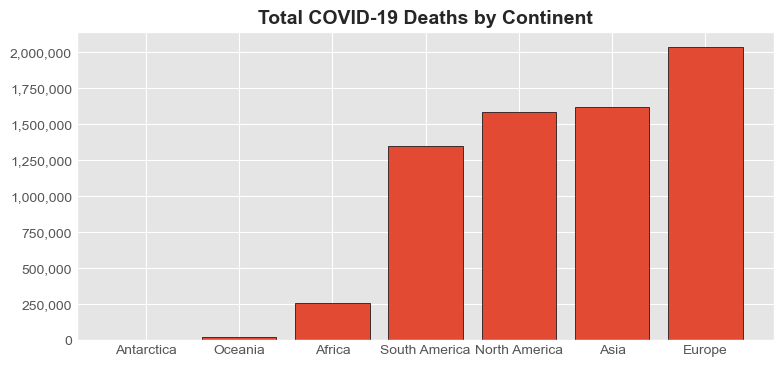

In [57]:
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(figsize = (9, 4))

    # Bar plot of total deaths per continent
    ax.bar(totals_series.index, totals_series.values, edgecolor = 'black')

    # Formatting
    ax.set_title('Total COVID-19 Deaths by Continent', fontsize = 14, weight = 'bold')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    plt.savefig('plots/continent_bar_plot.png', dpi = 500, bbox_inches = 'tight')

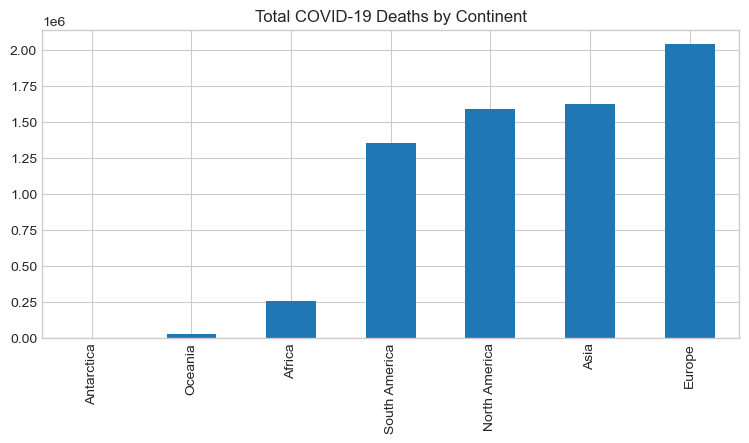

In [58]:
# Note: can create bar plot using pandas plotting method
totals_series.plot(
    kind = 'bar', 
    figsize = (9, 4), 
    xlabel = '',
    title = 'Total COVID-19 Deaths by Continent',
    #rot = 0 # uncomment to have xlabels horizontal
)

plt.show()

**5. Create a stacked bar chart of total number of COVID deaths per continent per year.**

To create the stacked bar plot, we must first calculate the number of COVID deaths for each continent in each year. To group the data on year, we use the `dt` accessor to create a new column that inidcates the year of the observation (note that alternatively we could have used the `resample` method).

In [59]:
# Create copy of merged data and add year column
df_year_totals = df_merge.copy()
df_year_totals['Year'] = df_year_totals['Date'].dt.year

# Calculate sum of new deaths for each continent in each year
df_year_totals = df_year_totals.groupby(['Continent', 'Year'])['New_deaths'].sum().reset_index()

df_year_totals.head()

,Continent,Year,New_deaths
0,Africa,2020,65355.0
1,Africa,2021,162746.0
2,Africa,2022,28926.0
3,Africa,2023,265.0
4,Antarctica,2020,0.0


Although it is possible to create a stacke bar chart with matplotlib, this is one of the (few) cases where it is actually easier to do it by using pandas plotting methods. Specifically, we use the `plot` method from pandas, and set `kind='bar'`. 

As a default, the pandas method `plot` will use the index as the values on the x-axis, and the values in the columns on the y-axis. Therefore, we first need to use `pivot` to reshape the data so that we have the continent as the index and the columns show the totals for a specific year.

In [60]:
df_pivot = df_year_totals.pivot(
    columns = 'Year',     # Create a new column for each value in "Year" column
    index = 'Continent',  # Use values in "Continent" column as the new index
    values = 'New_deaths' # Populate new columns with the values in "New_deaths"
)

df_pivot

Year,2020,2021,2022,2023
Continent,,,,
Africa,65355.0,162746.0,28926.0,265.0
Antarctica,0.0,0.0,0.0,0.0
Asia,337934.0,921775.0,256847.0,106973.0
Europe,567784.0,995742.0,442257.0,33148.0
North America,511449.0,710162.0,329315.0,36220.0
Oceania,946.0,2644.0,17592.0,2749.0
South America,418164.0,773812.0,149286.0,9067.0


We can now apply the `plot` method on the pivoted DataFrame. Note that because the DataFrame contains multiple columns (one for each year), pandas will plot the year observations side-by-side for each continent (unless we specify which column to use).

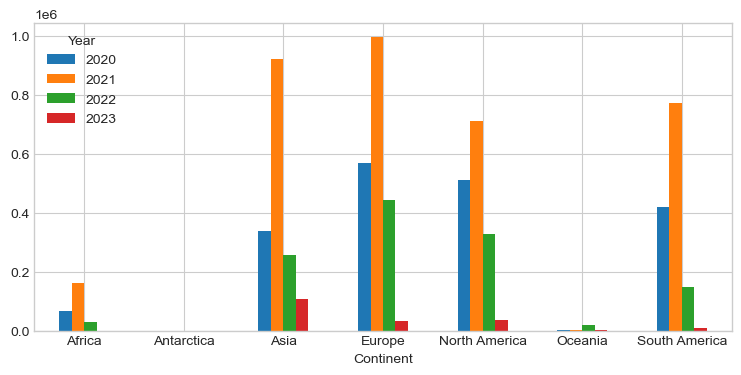

In [61]:
df_pivot.plot(
    # y = 2022,    # uncomment to select a specific year
    kind = 'bar',
    figsize = (9, 4),
    rot = 0
)

plt.show()

To get a *stacked* bar plot, we can simply set `stacked=True` in the function call to `plot`.

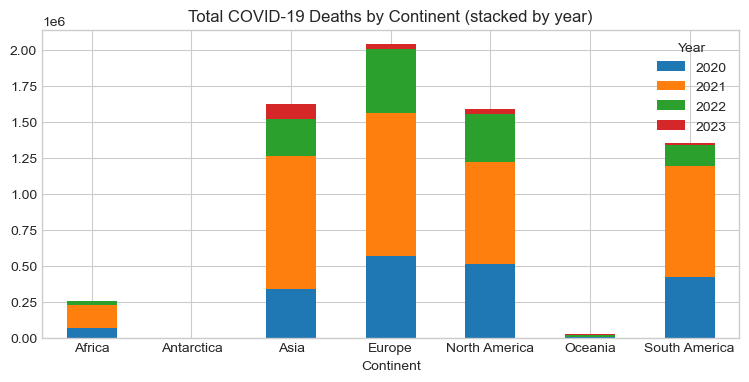

In [62]:
df_pivot.plot(
    kind = 'bar',
    stacked = True,
    figsize = (9, 4),
    rot = 0,
    title = 'Total COVID-19 Deaths by Continent (stacked by year)',
)

plt.show()

Note that the values on the y-axis are not very nice-looking. We can fix this by scaling the values in the DataFrame (e.g., divide by a 1000). Alternatively, if we want to be able to set the major tick formatter for the y-axis (which is an `Axes` method), we can use a trick in which we store the output of the function call to `plot` in a variable called `ax`.

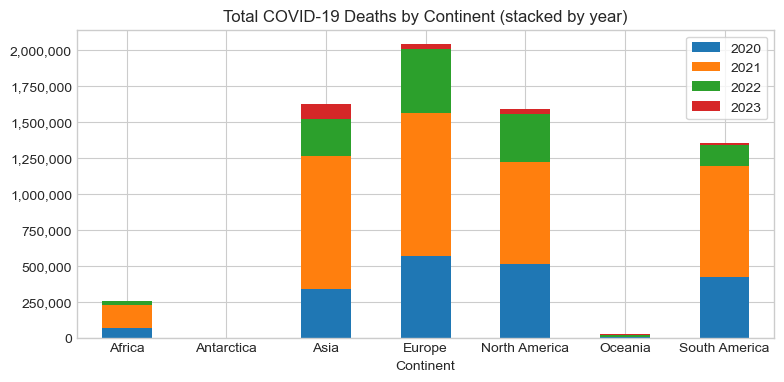

In [63]:
ax = df_pivot.plot(
    kind = 'bar',
    stacked = True,
    figsize = (9, 4),
    rot = 0,
    title = 'Total COVID-19 Deaths by Continent (stacked by year)',
)

# Format values on yaxis
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Remove title in legend and add frame
ax.legend(title = None, frameon = True)

plt.savefig('plots/continent_stacked_plot.png', dpi = 500, bbox_inches = 'tight')